In [1]:
import os
import pandas as pd 
import numpy as np 

# visualisation
import matplotlib.pylab as plt
import matplotlib.font_manager as fm

# our scripts 
import src.processing as sp 
import settings as st
import utils.helpers as hp

### Correct for the locations of the images 

In [ ]:
# dr5_desc = sp.read_parquet('gz_decals_volunteers_5', save = True, filename='decals_5_votes')

### Generate the descriptions for spiral and elliptical 

In [3]:
# dr5_desc = hp.read_parquet(st.data_dir, 'descriptions/decals_5_votes')

In [4]:
# dr5_spiral = sp.filtering(dr5_desc, st.condition_spiral, save=False, filename = 'decals_5_spiral')

In [5]:
# dr5_elliptical = sp.filtering(dr5_desc, st.condition_elliptical, save=False, filename = 'decals_5_elliptical')

### Subset of the Spirals and Ellipticals 

In [12]:
# df_spiral= sp.subset_df(dr5_spiral, 2000, random=True, save=True, filename='subset_spiral')

In [14]:
# df_elliptical = sp.subset_df(dr5_elliptical, 2000, random=True, save=True, filename='subset_elliptical')

### Move data
Given a pandas dataframe, copy images from Mike's folder to our folder.

In [12]:
# df_spiral = hp.read_parquet(st.data_dir, 'descriptions/subset_spiral')
# df_elliptical = hp.read_parquet(st.data_dir, 'descriptions/subset_elliptical')

In [13]:
# sp.copy_images(df_spiral, 'spiral')
# sp.copy_images(df_elliptical, 'elliptical')

### Split the data into Training/Validation

In [28]:
# d = sp.split_data(['spiral', 'elliptical'], save=False)

### Generate the Training/Validation sets (images)

In [2]:
# sp.images_train_validate(['spiral', 'elliptical'])

### Load Deep Learning Model

In [1]:
import os
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pylab as plt 

In [2]:
from src.networks import SiameseNetwork

In [3]:
model_path = '../fs-models/siamese_resnet18.pth'

In [4]:
device = torch.device('cpu')
model = SiameseNetwork(backbone="resnet18")

In [5]:
model.load_state_dict(torch.load(model_path, map_location=device))

<All keys matched successfully>

In [6]:
model.eval()

SiameseNetwork(
  (backbone): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

In [7]:
trans = [transforms.Grayscale(num_output_channels=1), transforms.ToTensor(), transforms.Resize(300), transforms.CenterCrop(224)]

In [8]:
transformation = transforms.Compose(trans)

Testing two spirals from the following folder

In [9]:
img_path_s = '/data/phys-zooniverse/phys2286/data/images/spiral/'
img_path_e = '/data/phys-zooniverse/phys2286/data/images/elliptical/'

In [10]:
path_s = os.listdir(img_path_s)
path_e = os.listdir(img_path_e)

In [19]:
img1 = img_path_s + path_s[100]
img2 = img_path_e + path_e[1425]

In [20]:
image1 = Image.open(img1).convert("RGB")
image2 = Image.open(img2).convert("RGB")

image1_t = transformation(image1).float()
image2_t = transformation(image2).float()

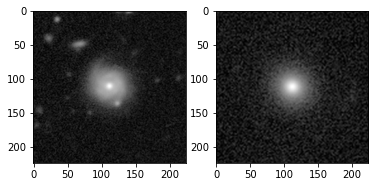

In [21]:
plt.figure()
plt.subplot(121)
plt.imshow(image1_t[0].numpy(), cmap='gray')

plt.subplot(122)
plt.imshow(image2_t[0].numpy(), cmap='gray')
plt.show()

In [22]:
model(image1_t.unsqueeze(1), image2_t.unsqueeze(1)).item()

1.2314958439674228e-06

In [26]:
# [500, 600]
# 0.3985
# 0.8597607016563416